In [43]:
import numpy as np
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn
from sklearn import cluster
%matplotlib inline #makes matplotlib show up! 

In [2]:
traffic = pd.read_csv('/Users/davidnyberg/Downloads/us-traffic-2015/dot_traffic_2015.txt.gz', compression='gzip', 
                         header=0, sep=',', quotechar='"')

In [3]:
traffic.shape
#7million entries is too much to work with

(7140391, 38)

In [33]:
#random sampling without replacement
traffic_sam = traffic.sample(frac = .2, replace = False)
traffic_sam.shape
#Now can use 1.4 million points for datamining for quicker analysis

(1428078, 38)

In [47]:
#drop useless columns, try's just for annoying errors if you accidently run this block again...
try:
    traffic_sam = traffic_sam.drop(['year_of_data'], axis = 1)
except ValueError:
    pass
try:
    traffic_sam = traffic_sam.drop(['fips_state_code'], axis = 1)
except ValueError:
    pass
#try:
    #traffic_sam = traffic_sam.drop(['functional_classification_name'], axis = 1)
except ValueError:
    pass
try:
    traffic_sam = traffic_sam.drop(['restrictions'], axis = 1)
except ValueError:
    pass
try:
    traffic_sam = traffic_sam.drop(['station_id'], axis = 1)
except ValueError:
    pass


In [48]:
traffic_sam.head(10)

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
5100964,2015-12-26,26,7,7,West,1R,Rural: Principal Arterial - Interstate,1,12,3,...,208,146,119,115,83,52,42,40,31,17
3437560,2015-02-08,8,1,5,South,3R,Rural: Principal Arterial - Other,0,2,3,...,900,974,956,830,875,739,495,313,244,147
7120081,2015-02-16,16,2,1,North,1U,Urban: Principal Arterial - Interstate,2,2,3,...,1072,1153,1134,1042,833,640,573,559,423,350
459305,2015-12-27,27,1,7,West,2U,Urban: Principal Arterial - Other Freeways or ...,0,12,3,...,313,313,329,264,164,137,112,93,75,49
2970014,2015-03-30,30,2,1,North,3U,Urban: Principal Arterial - Other,1,3,3,...,278,610,517,426,100,56,163,52,14,72
2359951,2015-11-10,10,3,3,East,2U,Urban: Principal Arterial - Other Freeways or ...,2,11,3,...,1267,1201,1184,1075,1022,768,726,633,471,473
5659955,2015-04-29,29,4,1,North,4R,Rural: Minor Arterial,2,4,3,...,187,228,280,244,153,85,55,30,16,13
2049486,2015-01-09,9,6,5,South,4R,Rural: Minor Arterial,1,1,3,...,273,274,256,255,172,106,91,73,84,38
3690288,2015-01-25,25,1,1,North,1U,Urban: Principal Arterial - Interstate,1,1,3,...,939,888,908,853,785,595,460,373,261,185
1181861,2015-09-05,5,7,5,South,1R,Rural: Principal Arterial - Interstate,2,9,3,...,557,511,450,370,282,206,166,198,164,88


In [49]:
#just testing some regression stats
#m = ols('traffic_volume_counted_after_1700_to_1800 ~ lane_of_travel',traffic_sam).fit()
#print m.summary()

Text(0,0.5,u'traffic volume')

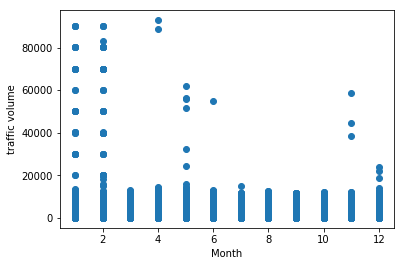

In [46]:
#interesting that there are higher volumes in jan/feb compared to summer!
#can change this for all times, not just 1600-1700
plt.scatter(traffic_sam.month_of_data, traffic_sam.traffic_volume_counted_after_1600_to_1700)
plt.xlabel('Month')
plt.ylabel('traffic volume')

In [ ]:
#now can use numpy arrays and sklearn for clustering 